# SI 618 Project Description

## Project Title

US Chronic Disease Indicators looking at Mental Health and alcohol use and reproductive health trends

## Team Members

- Lizett, Lizett Aguilar
- Saraizas, Shirley Araiza Santaella
- JRmcmill, Jonathan McMillan

## Overview

This project will explore three different Chronic Disease Indicators from the Centers for Disease Control (CDC). We are interested in seeing trends and patterns related to mental health, alcohol use among youth, and reproductive healthcare access.



## Motivation

These three data sets are from the Centers for Disease Control (CDC) US Chronic Disease Indicators, which are a set of agreed upon surveillance indicators for state and national public health agencies. These indicators are collected from a series of other data collection programs and compiled based on the indicator. The CDI is composed of 124 different indicators. According to the CDC, “18 topic groups: alcohol; arthritis; asthma; cancer; cardiovascular disease; chronic kidney disease; chronic obstructive pulmonary disease; diabetes; immunization; nutrition, physical activity, and weight status; oral health; tobacco; overarching conditions; and new topic areas that include disability, mental health, older adults, reproductive health, and school health. For the first time, CDI includes 22 indicators of systems and environmental change. A total of 201 individual measures are included for the 124 indicators, many of which overlap multiple chronic disease topic areas or are specific to a certain sex or age group.”

Citations:

Chronic disease Indicators, Overview. Centers for Disease Control. August 3rd, 2021. National Center for Chronic Disease Prevention and Health Promotion. https://www.cdc.gov/cdi/overview.html 




We chose the CDI data sets about: 
- Mental Health 
- Alcohol use 
- Reproductive Health 

Possible Questions: 
- How do negative mental health indicators correlate to the use of alcohol among youth?
- How does access to reproductive healthcare relate to mental health indicators?
- How does mental health, reproductive health care, and alcohol use among youth vary across states and demographics?

We are interested in exploring any potential relationships between mental health outcomes for youth and issues related to high risk activities such as alcohol use, as well as perceptions and access related to reproductive health outcomes. We are interested in exploring these particular issues with recent reports finding that youth substance use is linked to mental health distress. Although the data available about youth substance abuse that we were able to find didn't correspond as well with out current data sets we hope to find any patterns of those relationships in adult self reporting datasets. Additionally, we are interested in seeing if there are any relationships with mental health indicators and access to reproductive healthcare access, as access to care continues to face variation and volatility based on state contexts. In a recent report from the CDC as reported in the Associated press, “Mental health conditions were the leading underlying cause of pregnancy-related deaths from 2017 to 2019 with nearly 23% of pregnancy-related deaths attributed to mental health conditions, including suicides and overdoses from substance use disorders.”
Using mental health as an overarching theme, we intend to parse through any potential relationships with other significant public health measures, especially with these three areas finding increasing relevance in the current American healthcare context.

- Richtel, Matt. Teen Drug and Alcohol Use Linked to Mental Health Distress. New York Times. January 29th, 2024. https://www.nytimes.com/2024/01/29/health/teens-drugs-alcohol-mental-health.html

- Fernando, Christine. Mental health emerges as a dividing line in abortion rights initiatives planned for state ballots. February 13th, 2024. Associated Press. https://apnews.com/article/abortion-mental-health-ballot-maryland-missouri-arizona-6268ec88d1638009128b55fc56e3610c 

- Zaks, Nina. et al. Association Between Mental Health and Reproductive System Disorders in Women. Journal of the American Medical Association (JAMA). April 18th, 2023, 6(4): e238685. doi: 10.1001/jamanetworkopen.2023.8685



## Data Sources

We chose these three particular subsets of data due to the similarities in their structure. We are expected to be able to merge them with minimal risk of compromise to the data integrity.

- https://data.cdc.gov/Chronic-Disease-Indicators/U-S-Chronic-Disease-Indicators-Mental-Health/ixrt-gnsg/about_data
- https://data.cdc.gov/Chronic-Disease-Indicators/U-S-Chronic-Disease-Indicators-Alcohol-use-among-y/y4cx-ipur/about_data
- https://data.cdc.gov/Chronic-Disease-Indicators/U-S-Chronic-Disease-Indicators-Reproductive-Health/xrn9-9eas/about_data

## Data Description and Manipulation

#### Imports for reading data, plotting, etc.

In [1]:
import pandas as pd
from numpy import NaN
from matplotlib import pyplot as plt

/var/folders/7k/kt8nfzwd2pvgsvfsrs6vyjsm0000gn/T/ipykernel_61453/2047519988.py:1: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


#### Read in the data

In [2]:
mental_health = pd.read_csv('data/U.S._Chronic_Disease_Indicators__Mental_Health_20240217.csv')
alcohol = pd.read_csv('data/U.S._Chronic_Disease_Indicators__Alcohol_20240217.csv')
reproductive_health = pd.read_csv('data/U.S._Chronic_Disease_Indicators__Reproductive_Health_20240219.csv')

/var/folders/7k/kt8nfzwd2pvgsvfsrs6vyjsm0000gn/T/ipykernel_61453/655771790.py:2: DtypeWarning: Columns (10) have mixed types. Specify dtype option on import or set low_memory=False.
  alcohol = pd.read_csv('data/U.S._Chronic_Disease_Indicators__Alcohol_20240217.csv')


In [65]:
mental_health.head(2)

,YearStart,YearEnd,LocationDesc,DataSource,Topic,Question,DataValueUnit,DataValueType,DataValue,DataValueAlt,DataValueFootnoteSymbol,DatavalueFootnote,LowConfidenceLimit,HighConfidenceLimit,QuestionID,DataValueTypeID,Gender,Race/Ethnicity,Overall
0,2018,2018,Nevada,BRFSS,Mental Health,At least 14 recent mentally unhealthy days amo...,%,Crude Prevalence,21.6,21.6,NaN,NaN,17.2,26.8,MTH2_0,CRDPREV,NaN,NaN,Overall
1,2020,2020,Nevada,BRFSS,Mental Health,Recent mentally unhealthy days among adults ag...,Number,Mean,4.1,4.1,NaN,NaN,2.4,5.8,MTH1_0,MEAN,NaN,"Black, non-Hispanic",NaN


In [66]:
alcohol.head(2)

,YearStart,YearEnd,LocationDesc,DataSource,Topic,Question,DataValueUnit,DataValueType,DataValue,DataValueAlt,DataValueFootnoteSymbol,DatavalueFootnote,LowConfidenceLimit,HighConfidenceLimit,QuestionID,DataValueTypeID,Gender,Race/Ethnicity,Overall
0,2019,2019,Arizona,YRBSS,Alcohol,Alcohol use among youth,%,Crude Prevalence,29.5,29.5,NaN,NaN,24.9,34.7,ALC1_1,CRDPREV,Female,NaN,NaN
1,2019,2019,Ohio,YRBSS,Alcohol,Alcohol use among youth,%,Crude Prevalence,22.5,22.5,NaN,NaN,17.0,29.1,ALC1_1,CRDPREV,Male,NaN,NaN


In [67]:
reproductive_health.head(2)

,YearStart,YearEnd,LocationDesc,DataSource,Topic,Question,DataValueUnit,DataValueType,DataValue,DataValueAlt,DataValueFootnoteSymbol,DatavalueFootnote,LowConfidenceLimit,HighConfidenceLimit,QuestionID,DataValueTypeID,Race/Ethnicity,Overall
0,2012,2012,Nevada,BRFSS,Reproductive Health,Timeliness of routine health care checkup amon...,%,Crude Prevalence,58.9,58.9,NaN,NaN,54.6,63.0,RPH1_0,CRDPREV,NaN,Overall
1,2016,2016,Nebraska,BRFSS,Reproductive Health,Timeliness of routine health care checkup amon...,%,Crude Prevalence,63.1,63.1,NaN,NaN,55.1,70.4,RPH1_0,CRDPREV,Hispanic,NaN


#### Investigate sizes

In [3]:
for df in [mental_health, alcohol, reproductive_health]:
    print(df.shape)
    print()

(13200, 33)

(66091, 33)

(9086, 33)



We can see all three data sets have 33 columns, and thousands of rows.

#### Investigate columns of interest

In [4]:
# let's see what years we have data for
for df in [mental_health, alcohol, reproductive_health]:
    print(sorted(df.YearStart.unique()))
    print(sorted(df.YearEnd.unique()))
    print()

[2009, 2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019, 2020, 2021]
[2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019, 2020, 2021]

[2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019, 2020, 2021]
[2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019, 2020, 2021]

[2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019, 2020, 2021]
[2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019, 2020, 2021]



In [5]:
# let's see what sources we have data for
for df in [mental_health, alcohol, reproductive_health]:
    print(sorted(df.DataSource.unique()))
    print()

['BRFSS', 'PRAMS']

['AEDS', 'APIS', 'BRFSS', 'Legal Research', 'NVSS', 'PRAMS', 'YRBSS']

['BRFSS', 'PRAMS']



In [6]:
# let's see what demographics we have data for
for df in [mental_health, alcohol, reproductive_health]:
    print(sorted(df.StratificationCategory1.unique()))
    print(sorted(df.Stratification1.unique()))
    print()

['Gender', 'Overall', 'Race/Ethnicity']
['Black, non-Hispanic', 'Female', 'Hispanic', 'Male', 'Multiracial, non-Hispanic', 'Other, non-Hispanic', 'Overall', 'White, non-Hispanic']

['Gender', 'Overall', 'Race/Ethnicity']
['American Indian or Alaska Native', 'Asian or Pacific Islander', 'Asian, non-Hispanic', 'Black, non-Hispanic', 'Female', 'Hispanic', 'Male', 'Multiracial, non-Hispanic', 'Other, non-Hispanic', 'Overall', 'White, non-Hispanic']

['Overall', 'Race/Ethnicity']
['American Indian or Alaska Native', 'Asian or Pacific Islander', 'Black, non-Hispanic', 'Hispanic', 'Multiracial, non-Hispanic', 'Other, non-Hispanic', 'Overall', 'White, non-Hispanic']



#### None for the 2nd and 3rd demographic categories:

In [7]:
for df in [mental_health, alcohol, reproductive_health]:
    print(sorted(df.StratificationCategory2.unique()))
    print(sorted(df.Stratification2.unique()))
    print()

[nan]
[nan]

[nan]
[nan]

[nan]
[nan]



In [8]:
for df in [mental_health, alcohol, reproductive_health]:
    print(sorted(df.StratificationCategory3.unique()))
    print(sorted(df.Stratification3.unique()))
    print()

[nan]
[nan]

[nan]
[nan]

[nan]
[nan]



#### Expanding the StratificationCategory1 column

In [9]:
for df in [mental_health, alcohol]:
    df['Gender'] = df.apply(lambda row: row.Stratification1 if row.StratificationCategory1 == 'Gender' else NaN, axis=1)

In [10]:
for df in [mental_health, alcohol, reproductive_health]:
    df['Race/Ethnicity'] = df.apply(lambda row: row.Stratification1 if row.StratificationCategory1 == 'Race/Ethnicity' else NaN, axis=1)

In [11]:
for df in [mental_health, alcohol, reproductive_health]:
    df['Overall'] = df.apply(lambda row: row.Stratification1 if row.StratificationCategory1 == 'Overall' else NaN, axis=1)

In [12]:
# drop repetitive Stratification columns
drop_cols = ['StratificationCategory1', 'Stratification1', 'StratificationCategory2', 'Stratification2', 'StratificationCategory3', 'Stratification3', 'StratificationCategoryID1', 'StratificationID1', 'StratificationCategoryID2', 'StratificationID2', 'StratificationCategoryID3', 'StratificationID3']

for df in [mental_health, alcohol, reproductive_health]:
    df.drop(drop_cols, axis=1, inplace=True)

In [13]:
mental_health.head(3)

,YearStart,YearEnd,LocationAbbr,LocationDesc,DataSource,Topic,Question,Response,DataValueUnit,DataValueType,...,LowConfidenceLimit,HighConfidenceLimit,ResponseID,LocationID,TopicID,QuestionID,DataValueTypeID,Gender,Race/Ethnicity,Overall
0,2018,2018,NV,Nevada,BRFSS,Mental Health,At least 14 recent mentally unhealthy days amo...,NaN,%,Crude Prevalence,...,17.2,26.8,NaN,32,MTH,MTH2_0,CRDPREV,NaN,NaN,Overall
1,2020,2020,NV,Nevada,BRFSS,Mental Health,Recent mentally unhealthy days among adults ag...,NaN,Number,Mean,...,2.4,5.8,NaN,32,MTH,MTH1_0,MEAN,NaN,"Black, non-Hispanic",NaN
2,2018,2018,NV,Nevada,BRFSS,Mental Health,Recent mentally unhealthy days among adults ag...,NaN,Number,Mean,...,4.4,5.6,NaN,32,MTH,MTH1_0,MEAN,Female,NaN,NaN


Expanded the stratification category for race, gender, and overall column, and then where ever there is a value in that row, that row will have a summary statistic for that demographic category. This was done for all three datasets.

#### Investigate Location data columns

In [14]:
for df in [mental_health, alcohol, reproductive_health]:
    print(df.LocationAbbr.nunique())
    print(df.LocationDesc.nunique())
    print(df.LocationID.nunique())
    print()

55
55
55

55
55
55

55
55
55



In [15]:
# print if the LocationAbbr, LocationDesc, and LocationID have the same values for each dataset
for location in ['LocationAbbr', 'LocationDesc', 'LocationID']:
    print(set(mental_health[location].unique()) == set(alcohol[location].unique()))
    print(set(mental_health[location].unique()) == set(reproductive_health[location].unique()))
    print(set(alcohol[location].unique()) == set(reproductive_health[location].unique()))
    print()

True
True
True

True
True
True

True
True
True



In [16]:
# just keep one of them, LocationDesc
for df in [mental_health, alcohol, reproductive_health]:
    df.drop(['LocationAbbr', 'LocationID'], axis=1, inplace=True)

In [17]:
# find columns in all DFs that only have NaN values
for df in [mental_health, alcohol, reproductive_health]:
    print(df.columns[df.isna().all()].tolist())

['Response', 'ResponseID']
['Response', 'ResponseID']
['Response', 'ResponseID']


In [18]:
# remove Reponse and ResponseID from all DFs
for df in [mental_health, alcohol, reproductive_health]:
    df.drop(['Response', 'ResponseID'], axis=1, inplace=True)

In [19]:
mental_health.head(3)

,YearStart,YearEnd,LocationDesc,DataSource,Topic,Question,DataValueUnit,DataValueType,DataValue,DataValueAlt,DataValueFootnoteSymbol,DatavalueFootnote,LowConfidenceLimit,HighConfidenceLimit,TopicID,QuestionID,DataValueTypeID,Gender,Race/Ethnicity,Overall
0,2018,2018,Nevada,BRFSS,Mental Health,At least 14 recent mentally unhealthy days amo...,%,Crude Prevalence,21.6,21.6,NaN,NaN,17.2,26.8,MTH,MTH2_0,CRDPREV,NaN,NaN,Overall
1,2020,2020,Nevada,BRFSS,Mental Health,Recent mentally unhealthy days among adults ag...,Number,Mean,4.1,4.1,NaN,NaN,2.4,5.8,MTH,MTH1_0,MEAN,NaN,"Black, non-Hispanic",NaN
2,2018,2018,Nevada,BRFSS,Mental Health,Recent mentally unhealthy days among adults ag...,Number,Mean,5.0,5.0,NaN,NaN,4.4,5.6,MTH,MTH1_0,MEAN,Female,NaN,NaN


In [20]:
# print all unique Topic and TopicID values for each DF
for df in [mental_health, alcohol, reproductive_health]:
    print(sorted(df.Topic.unique()))
    print(sorted(df.TopicID.unique()))
    print()

['Mental Health']
['MTH']

['Alcohol']
['ALC']

['Reproductive Health']
['RPH']



In [21]:
# drop TopicID from all DFs
for df in [mental_health, alcohol, reproductive_health]:
    df.drop(['TopicID'], axis=1, inplace=True)

In [22]:
# get unique DataValueType and DataValueTypeID values for each DF
for df in [mental_health, alcohol, reproductive_health]:
    print(sorted(df.DataValueType.unique()))
    print(sorted(df.DataValueTypeID.unique()))
    print()

# and get the common DataValueType values across mental_health and alcohol, then mental_health and reproductive_health
print(set(mental_health.DataValueType.unique()) & set(alcohol.DataValueType.unique()))
print(set(mental_health.DataValueType.unique()) & set(reproductive_health.DataValueType.unique()))

['Age-adjusted Mean', 'Crude Prevalence', 'Mean']
['AGEADJMEAN', 'CRDPREV', 'MEAN']

['Age-adjusted Mean', 'Age-adjusted Prevalence', 'Age-adjusted Rate', 'Commercial host (dram shop) liability status for alcohol service', 'Crude Prevalence', 'Crude Rate', 'Local control of the regulation of alcohol outlet density', 'Mean', 'Number', 'Per capita alcohol consumption', 'US Dollars']
['AGEADJMEAN', 'AGEADJPREV', 'AGEADJRATE', 'COMMHSTLIAB', 'CRDPREV', 'CRDRATE', 'LCLCNTRLALC', 'MEAN', 'NMBR', 'PERCAPALC', 'USD']

['Crude Prevalence']
['CRDPREV']

{'Crude Prevalence', 'Age-adjusted Mean', 'Mean'}
{'Crude Prevalence'}


#### NOTE: *Crude Prevalence* is the answer to: How many *something* occurred per year for every 100,000 persons in the selected population?
[https://www.cdc.gov/injury/wisqars/mapping_help/crude_rate.html]

In [23]:
mental_health[(mental_health.DataValueType == 'Mean') & (mental_health.LocationDesc == 'Michigan') & (mental_health.Overall == 'Overall')].Question.unique()

array(['Recent mentally unhealthy days among adults aged >= 18 years'],
      dtype=object)

## Data Visualization

#### Let's look at some graphs of the data for MI

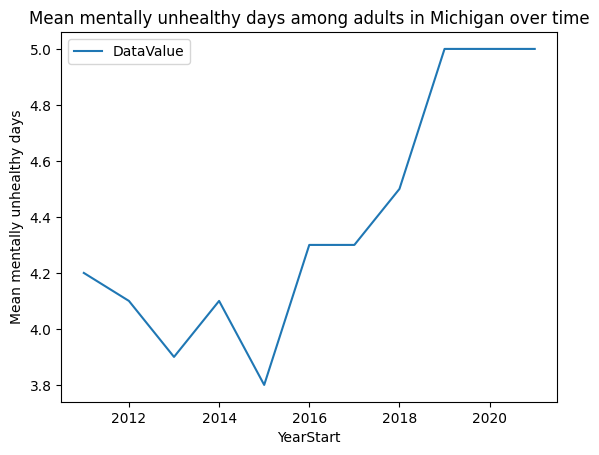

In [42]:
mental_health[(mental_health.DataValueType == 'Mean') & (mental_health.LocationDesc == 'Michigan') & (mental_health.Overall == 'Overall')].sort_values(by='YearStart').plot(x='YearStart', y='DataValue', kind='line')
plt.ylabel('Mean mentally unhealthy days')
_ = plt.title('Mean mentally unhealthy days among adults in Michigan over time')

In [25]:
alcohol[(alcohol.DataValueType == 'Mean') & (alcohol.LocationDesc == 'Michigan') & (alcohol.Overall == 'Overall') & (alcohol.Question == 'Binge drinking frequency among adults aged >= 18 years who binge drink')].head(3)

,YearStart,YearEnd,LocationDesc,DataSource,Topic,Question,DataValueUnit,DataValueType,DataValue,DataValueAlt,DataValueFootnoteSymbol,DatavalueFootnote,LowConfidenceLimit,HighConfidenceLimit,QuestionID,DataValueTypeID,Gender,Race/Ethnicity,Overall
40651,2018,2018,Michigan,BRFSS,Alcohol,Binge drinking frequency among adults aged >= ...,Number,Mean,4.8,4.8,NaN,NaN,4.4,5.2,ALC3_0,MEAN,NaN,NaN,Overall
40861,2021,2021,Michigan,BRFSS,Alcohol,Binge drinking frequency among adults aged >= ...,Number,Mean,5.0,5.0,NaN,NaN,4.4,5.7,ALC3_0,MEAN,NaN,NaN,Overall
40936,2017,2017,Michigan,BRFSS,Alcohol,Binge drinking frequency among adults aged >= ...,Number,Mean,4.5,4.5,NaN,NaN,4.2,4.9,ALC3_0,MEAN,NaN,NaN,Overall


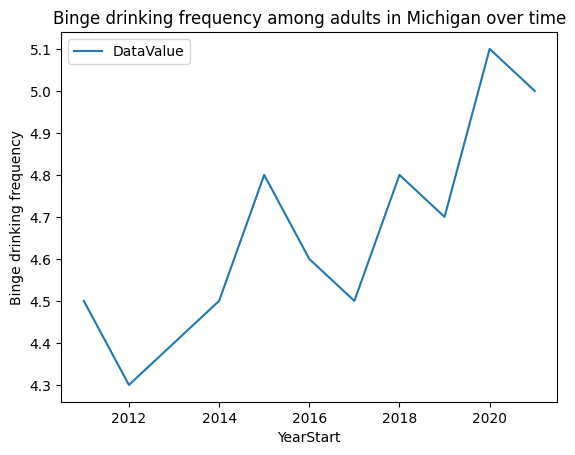

In [43]:
alcohol[(alcohol.DataValueType == 'Mean') & (alcohol.LocationDesc == 'Michigan') & (alcohol.Overall == 'Overall') & (alcohol.Question == 'Binge drinking frequency among adults aged >= 18 years who binge drink')].sort_values(by='YearStart').plot(x='YearStart', y='DataValue', kind='line')
plt.ylabel('Binge drinking frequency')
_ = plt.title('Binge drinking frequency among adults in Michigan over time')

#### And combined for correlation

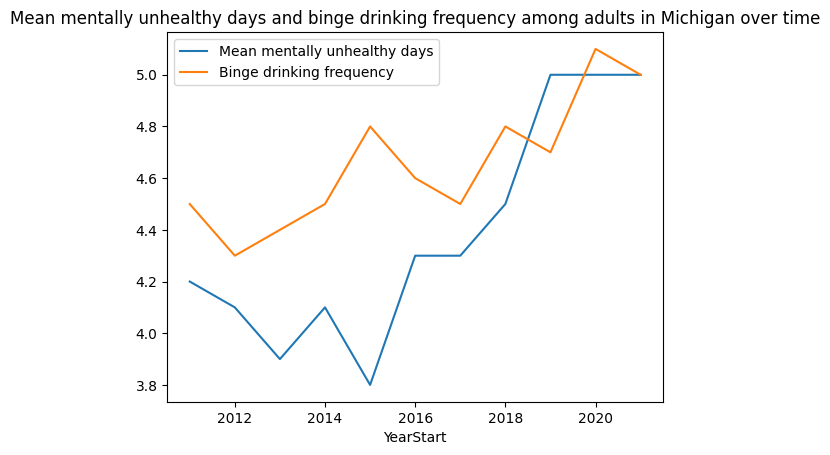

In [45]:
mh_mi = mental_health[(mental_health.DataValueType == 'Mean') & (mental_health.LocationDesc == 'Michigan') & (mental_health.Overall == 'Overall')]
al_mi = alcohol[(alcohol.DataValueType == 'Mean') & (alcohol.LocationDesc == 'Michigan') & (alcohol.Overall == 'Overall') & (alcohol.Question == 'Binge drinking frequency among adults aged >= 18 years who binge drink')]
mh_mi.merge(al_mi, on='YearStart', suffixes=('_mh', '_al'), how='inner').sort_values(by='YearStart').plot(x='YearStart', y=['DataValue_mh', 'DataValue_al'], kind='line')
plt.legend(['Mean mentally unhealthy days', 'Binge drinking frequency'])
_ = plt.title('Mean mentally unhealthy days and binge drinking frequency among adults in Michigan over time')

We see an interesting trend among the two variables over time, something to consider investigating in the future.

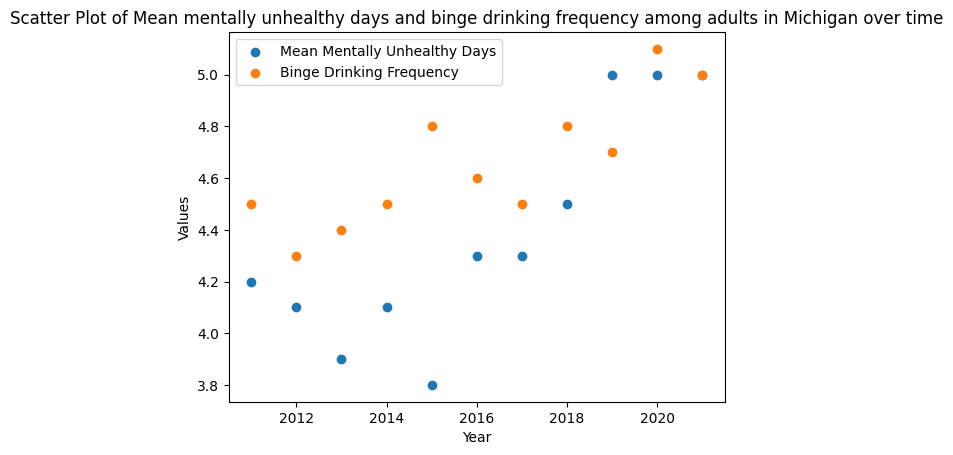

In [49]:
# Merge the DataFrames
mh_al_mi = mh_mi.merge(al_mi, on='YearStart', suffixes=('_mh', '_al'), how='inner').sort_values(by='YearStart')

# Create a scatter plot of the line plot
plt.scatter(mh_al_mi['YearStart'], mh_al_mi['DataValue_mh'], label='Mean Mentally Unhealthy Days')
plt.scatter(mh_al_mi['YearStart'], mh_al_mi['DataValue_al'], label='Binge Drinking Frequency')
plt.xlabel('Year')
plt.ylabel('Values')
plt.title('Scatter Plot of Mean mentally unhealthy days and binge drinking frequency among adults in Michigan over time')
plt.legend()
plt.show()

In [50]:
# find the correlation coefficient between the two variables
mh_al_mi['DataValue_mh'].corr(mh_al_mi['DataValue_al'])

0.6904164189808101

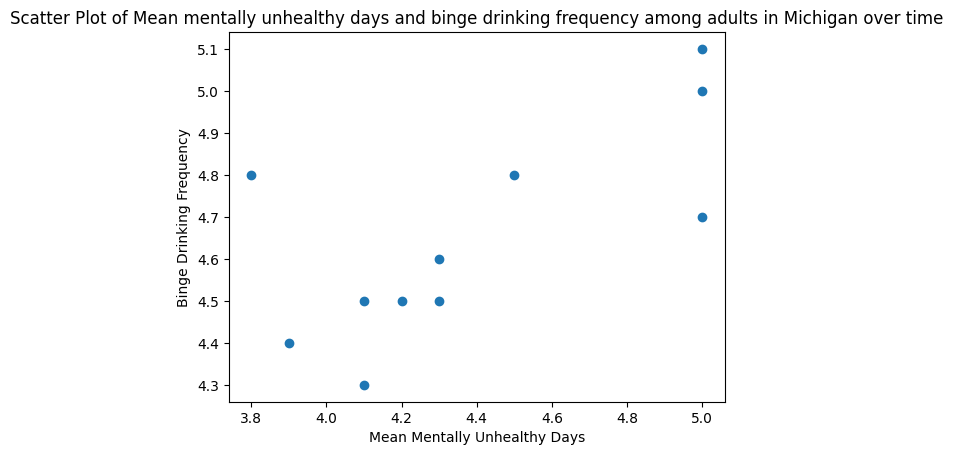

In [51]:
plt.scatter(mh_al_mi['DataValue_mh'], mh_al_mi['DataValue_al'])
plt.xlabel('Mean Mentally Unhealthy Days')
plt.ylabel('Binge Drinking Frequency')
plt.title('Scatter Plot of Mean mentally unhealthy days and binge drinking frequency among adults in Michigan over time')
_ = plt.show()

Positive correlation of 0.7 between the incidence of binge drinking and average mentally unhealthy days in the state of Michigan, indicating that binge drinking increases as people self report mentally unhealthy days.

In [52]:
# get unique Question values for reproductive_health
reproductive_health.Question.unique()

array(['Timeliness of routine health care checkup among women aged 18-44 years',
       'Postpartum checkup', 'Folic acid supplementation'], dtype=object)

In [53]:
# and get the reported aggregate values for Michigan
reproductive_health[(reproductive_health.DataValueType == 'Crude Prevalence') & (reproductive_health.LocationDesc == 'Michigan') & (reproductive_health.Overall == 'Overall')].Question.unique()

array(['Postpartum checkup', 'Folic acid supplementation',
       'Timeliness of routine health care checkup among women aged 18-44 years'],
      dtype=object)

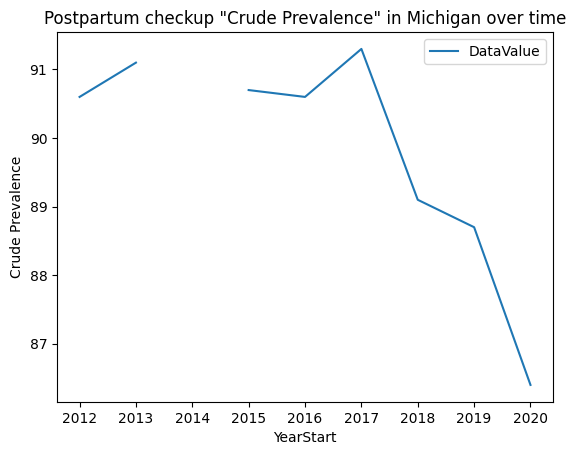

In [54]:
reproductive_health[(reproductive_health.DataValueType == 'Crude Prevalence') & (reproductive_health.LocationDesc == 'Michigan') & (reproductive_health.Overall == 'Overall') & (reproductive_health.Question == 'Postpartum checkup')].sort_values(by='YearStart').plot(x='YearStart', y='DataValue', kind='line')
plt.title('Postpartum checkup "Crude Prevalence" in Michigan over time')
plt.ylabel('Crude Prevalence')
_ = plt.show()

In [55]:
# check reproductive_health for missing YearStart values of 2013 to 2015
reproductive_health[(reproductive_health.YearStart <= 2013) | (reproductive_health.YearStart >= 2015)].YearStart.unique()

array([2012, 2016, 2013, 2015, 2017, 2019, 2020, 2018, 2021, 2011])

We can see the reproductive health data set is missing a *YearStart* of 2014.

In [56]:
# let's find the correlation coefficient between the two variables
rh_mi = reproductive_health[(reproductive_health.DataValueType == 'Crude Prevalence') & (reproductive_health.LocationDesc == 'Michigan') & (reproductive_health.Overall == 'Overall') & (reproductive_health.Question == 'Postpartum checkup')]
mh_rh_mi = mh_mi.merge(rh_mi, on='YearStart', suffixes=('_mh', '_rh'), how='inner').sort_values(by='YearStart')
mh_rh_mi['DataValue_mh'].corr(mh_rh_mi['DataValue_rh'])

-0.8402165453495583

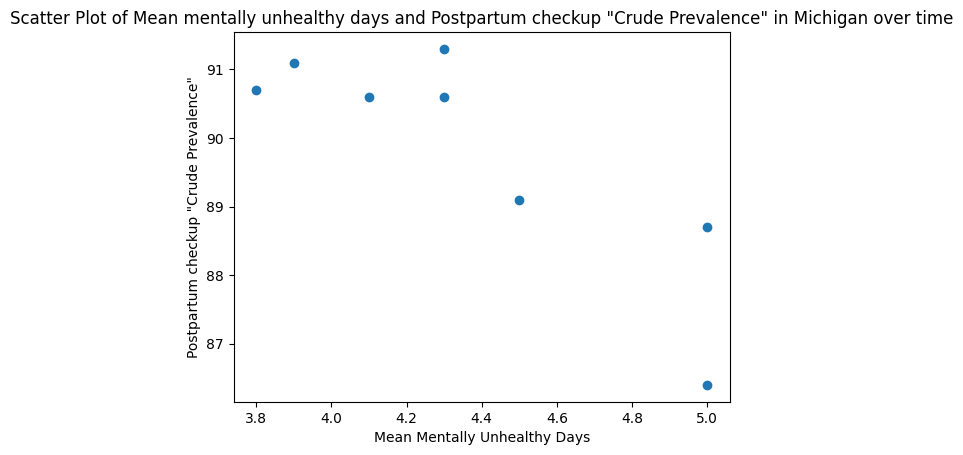

In [57]:
# now let's plot the scatter plot
plt.scatter(mh_rh_mi['DataValue_mh'], mh_rh_mi['DataValue_rh'])
plt.xlabel('Mean Mentally Unhealthy Days')
plt.ylabel('Postpartum checkup "Crude Prevalence"')
plt.title('Scatter Plot of Mean mentally unhealthy days and Postpartum checkup "Crude Prevalence" in Michigan over time')
_ = plt.show()

Strong negative correlation of -0.84, indicating that as the number of postpartum checkups decreased, that was associated with a higher average of overall mentally unhealthy days.

#### Distributions of means across data sets

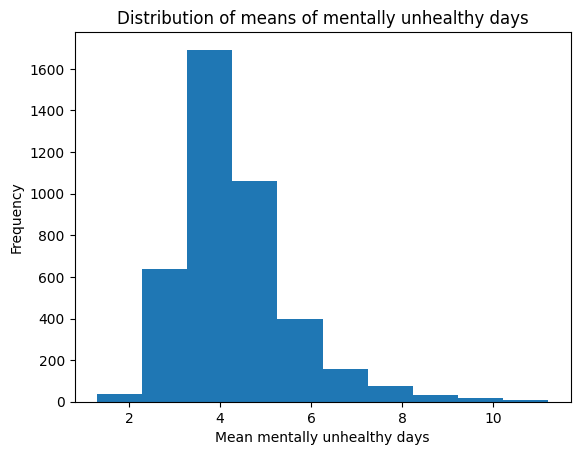

In [59]:
# histogram of means of mentally unhealthy days
mental_health[mental_health.DataValueType == 'Mean'].DataValue.plot(kind='hist')
plt.xlabel('Mean mentally unhealthy days')
_ = plt.title('Distribution of means of mentally unhealthy days')

We can see the distribution of means is "normal-ish", and right skewed, indicating the number of reported mentally-unhealthy days tends toward the lower values.

/var/folders/7k/kt8nfzwd2pvgsvfsrs6vyjsm0000gn/T/ipykernel_61453/3109894760.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['DataValue'] = pd.to_numeric(df['DataValue'], errors='coerce')


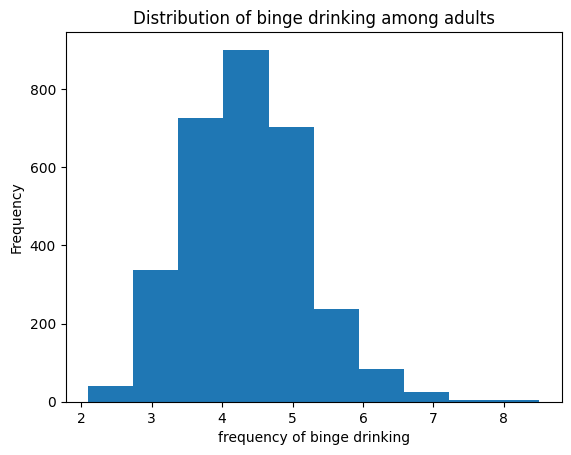

In [63]:
# histogram of means of binge drinking frequency, ignoring NaN values
df = alcohol[(alcohol.DataValueType == 'Mean') & (alcohol.Question == 'Binge drinking frequency among adults aged >= 18 years who binge drink')]
df['DataValue'] = pd.to_numeric(df['DataValue'], errors='coerce')
df.DataValue.dropna().plot(kind='hist')
plt.title('Distribution of binge drinking among adults')
plt.xlabel('frequency of binge drinking')
_ = plt.show()

This distribution is also fairly normal. It's also right skewed, but less so than the the mental health means.

/var/folders/7k/kt8nfzwd2pvgsvfsrs6vyjsm0000gn/T/ipykernel_61453/3425637516.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['DataValue'] = pd.to_numeric(df['DataValue'], errors='coerce')


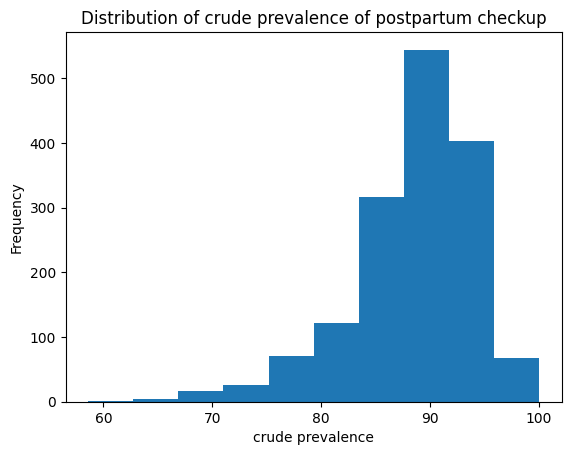

In [64]:
# histogram of crude prevalence of postpartum checkup
df = reproductive_health[(reproductive_health.DataValueType == 'Crude Prevalence') & (reproductive_health.Question == 'Postpartum checkup')]
df['DataValue'] = pd.to_numeric(df['DataValue'], errors='coerce')
df.DataValue.dropna().plot(kind='hist')
plt.title('Distribution of crude prevalence of postpartum checkup')
plt.xlabel('crude prevalence')
_ = plt.show()

Finally, we have another normal distribution for "crude prevalence" of postpartum checkup. While the prior distributions were right skewed, this one appears left skewed, indicating a more optimistic statistic that it's more common for higher percentages of populations to have postpartum checkups.

Overall, we have a lot to work with across these three data sets. We have further ideas for investigating trends across various demographics like race and gender, and feel confident we can perform statistical tests with our aggregate data since the confidence interval values are included. We plan to merge the alcohol and reproductive health data sets separately with the mental health data set when conducting further analysis, as needed, since the main focus is mental health impacts.